In [12]:
import sys
sys.path = ['/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages'] + sys.path

In [2]:
from matplotlib import pyplot as plt
import gwpy
from gwpy.timeseries import TimeSeries
import numpy as np
import pandas as pd
import seaborn as sns

/home/jovyan/.local/lib/python3.9/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


In [3]:
MDC_PATH = "/cvmfs/et-gw.osgstorage.org/et-gw/PUBLIC/MDC1/data"
DATASETS = ['E0','E1','E2','E3','C1','C2']
CHANNELS = {n : f'{n}:STRAIN' for n in DATASETS}

In [4]:
e0 = TimeSeries.read(MDC_PATH+'/E1/E-E1_STRAIN_DATA-1000000000-2048.gwf', 'E1:STRAIN')
# The TimeSeries object contains various useful metadata
print(e0[1:10])

TimeSeries([-5.54284896e-23,  8.72894580e-23, -1.52215950e-22,
             1.93370972e-22, -1.56591158e-22,  2.12791581e-22,
            -7.75441870e-23, -5.23293157e-23, -7.15922186e-23]
           unit: strain,
           t0: 1000000000.0001221 s,
           dt: 0.0001220703125 s,
           name: E1:STRAIN,
           channel: None)


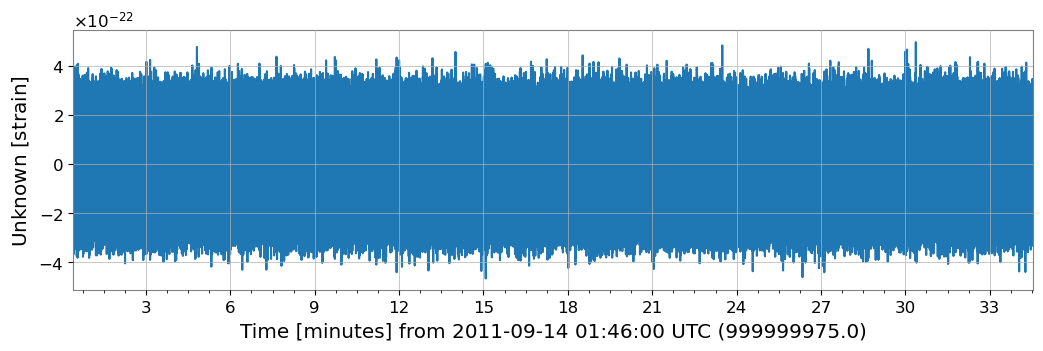

In [16]:
%matplotlib inline
plot = e0.plot()

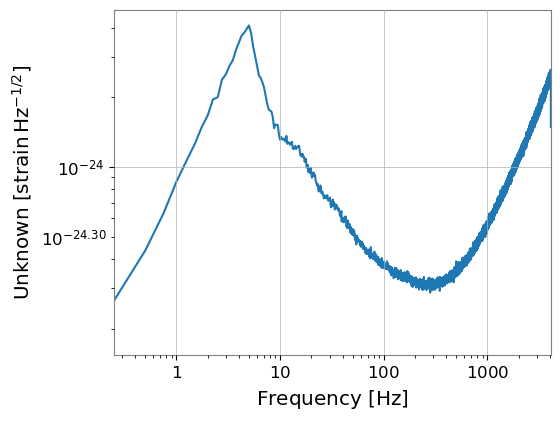

In [19]:
asd = e0.asd(fftlength=4, method="median")
plot = asd.plot()
plot.show(warn=False)

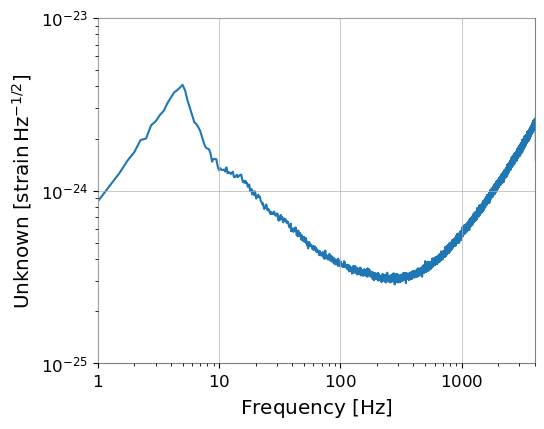

In [27]:
ax = plot.gca()
ax.set_xlim(1, 4000)
ax.set_ylim(1e-25, 1e-23)
plot

In [28]:
# Whitening the strain data using a window of 4 seconds and a step of 2 seconds
white = e0.whiten(8, 4)

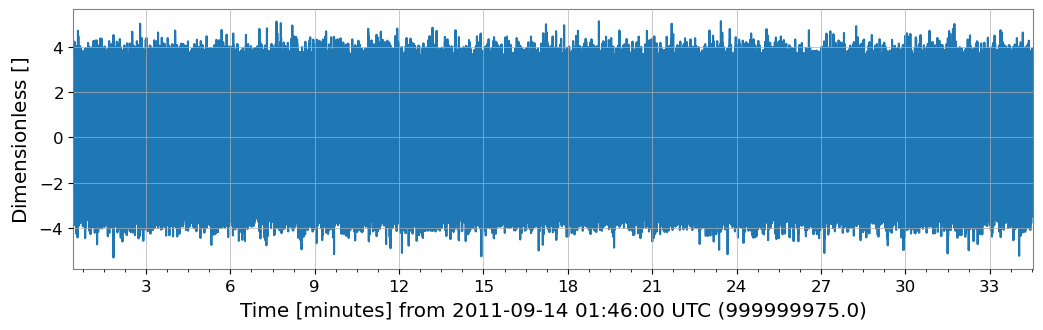

In [29]:
%matplotlib inline
plot = white.plot()



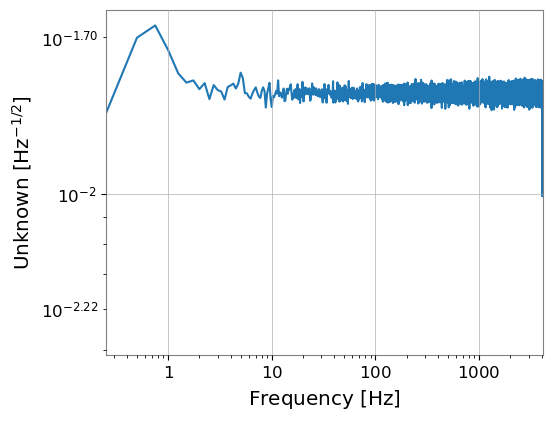

In [30]:
asd = white.asd(fftlength=4, method="median")
plot = asd.plot()
plot.show(warn=False)

/tmp/ipykernel_263/1386611104.py:3: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(1e-2, 1e-2)


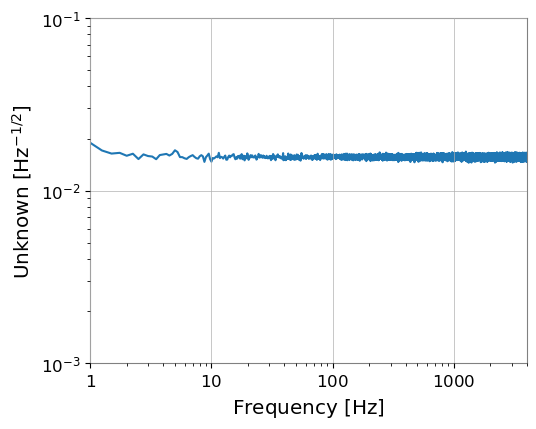

In [32]:
ax = plot.gca()
ax.set_xlim(1, 4000)
ax.set_ylim(1e-2, 1e-2)
plot

In [7]:
# Display the multi-panel plot
plot.show()

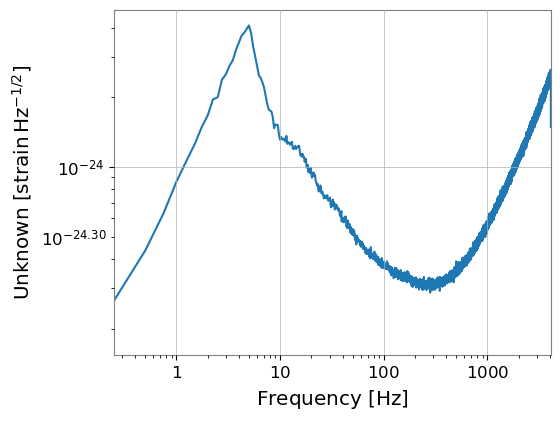

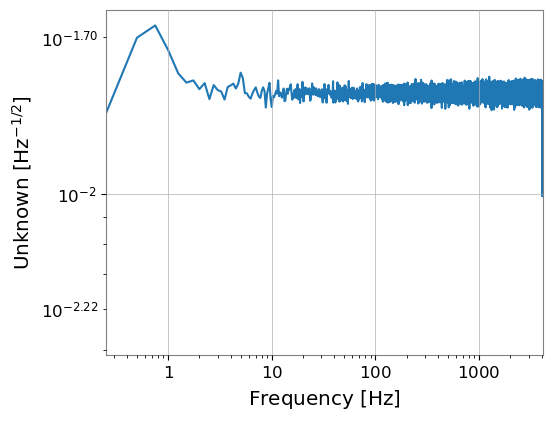

In [8]:
# Plotting Amplitude Spectral Density (ASD)

# Calculate and plot the ASD (Amplitude Spectral Density) of the original 'strain' data
# The 'fftlength=4' argument sets the length of the Fast Fourier Transform (FFT) window to 4 seconds
fig1 = e0.asd(fftlength=4).plot()

# Calculate and plot the ASD of the whitened 'white' data
# The 'fftlength=4' argument sets the length of the FFT window to 4 seconds
fig2 = white.asd(fftlength=4).plot()

# Uncomment the following lines to set custom x-axis and y-axis limits:
# plt.xlim(10, 2000)   # Set custom x-axis limits (frequency range)
# plt.ylim(1e-24, 1e-19)   # Set custom y-axis limits (ASD values)

In [9]:
# Display the multi-panel plot
plot.show()